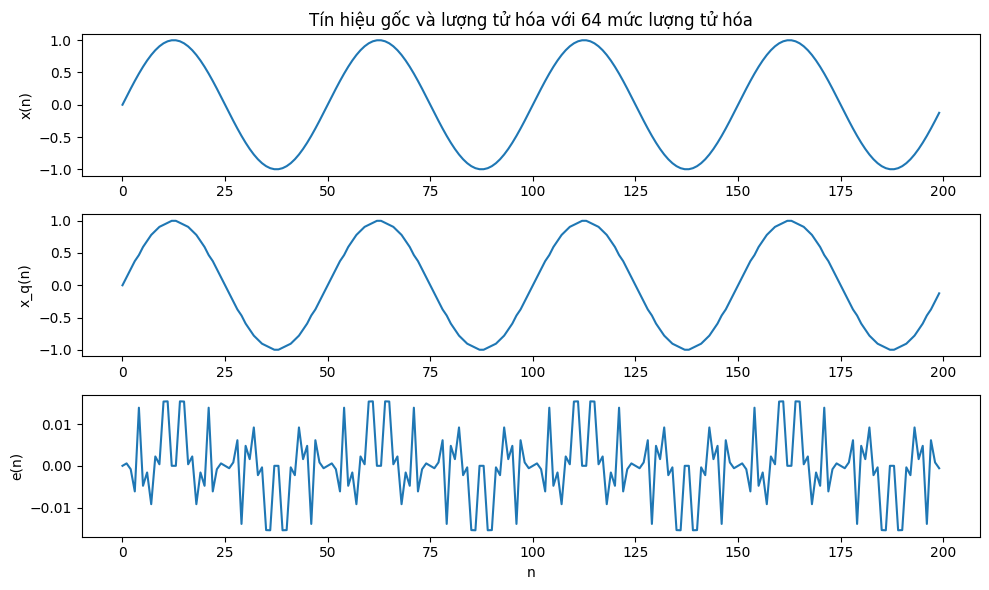

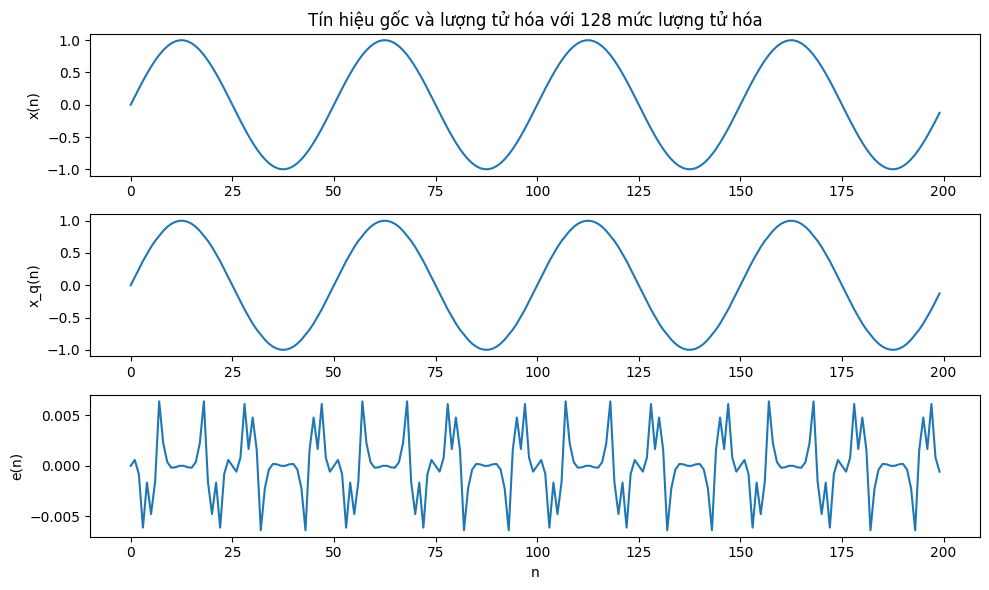

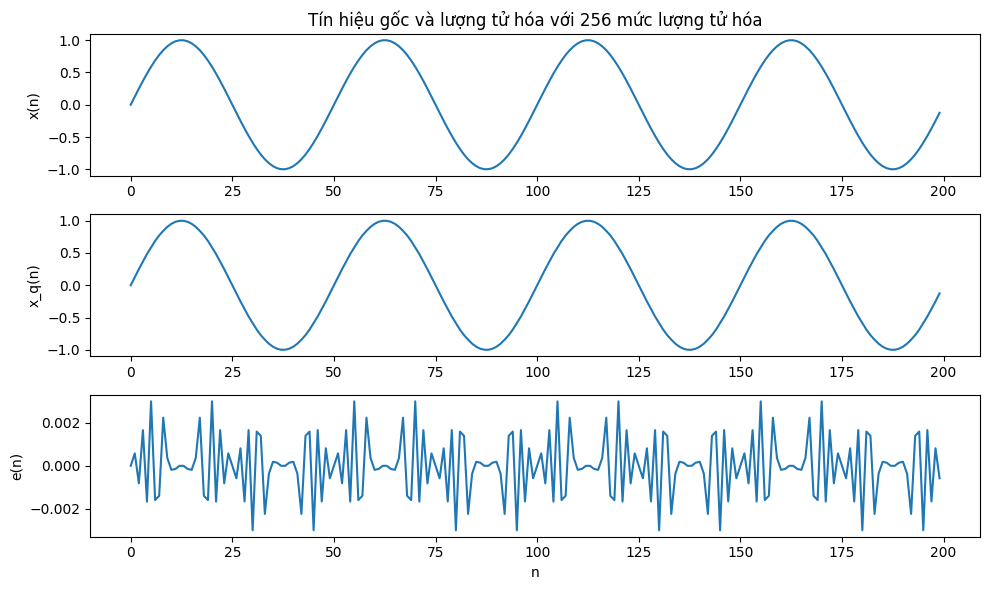

SQNR cho 64 mức lượng tử hóa: 38.80 dB
SQNR cho 128 mức lượng tử hóa: 47.42 dB
SQNR cho 256 mức lượng tử hóa: 53.93 dB


In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Các thông số
f0 = 1 / 50
N = 200
n = np.arange(N)
x_n = np.sin(2 * np.pi * f0 * n)

# Hàm lượng tử hóa tín hiệu với các mức lượng tử hóa cho trước
def quantize_signal(x, levels):
    x_min, x_max = np.min(x), np.max(x)
    step_size = (x_max - x_min) / levels
    x_q = np.floor((x - x_min) / step_size + 0.5) * step_size + x_min
    return x_q

# Hàm tính công suất lỗi lượng tử
def quantization_error_power(x, x_q):
    error = x - x_q
    error_power = np.mean(error ** 2)
    return error_power

# Tính SQNR
def compute_sqnr(x, error_power):
    signal_power = np.mean(x ** 2)
    sqnr = 10 * np.log10(signal_power / error_power)
    return sqnr

# Các mức lượng tử hóa
quant_levels = [64, 128, 256]

# Lưu trữ kết quả
sqnr_values = []

# Xử lý cho từng mức lượng tử hóa
for levels in quant_levels:
    x_q = quantize_signal(x_n, levels)
    error_power = quantization_error_power(x_n, x_q)
    sqnr = compute_sqnr(x_n, error_power)
    sqnr_values.append(sqnr)

    # Vẽ tín hiệu x(n), tín hiệu lượng tử hóa x_q(n), và sai số e(n)
    plt.figure(figsize=(10, 6))
    
    plt.subplot(3, 1, 1)
    plt.plot(n, x_n, label='x(n)')
    plt.title(f"Tín hiệu gốc và lượng tử hóa với {levels} mức lượng tử hóa")
    plt.ylabel('x(n)')
    
    plt.subplot(3, 1, 2)
    plt.plot(n, x_q, label=f"x_q(n) ({levels} mức)")
    plt.ylabel('x_q(n)')
    
    plt.subplot(3, 1, 3)
    plt.plot(n, x_n - x_q, label='e(n)')
    plt.ylabel('e(n)')
    plt.xlabel('n')
    
    plt.tight_layout()
    plt.show()

# In kết quả SQNR
for levels, sqnr in zip(quant_levels, sqnr_values):
    print(f"SQNR cho {levels} mức lượng tử hóa: {sqnr:.2f} dB")
